1. Optimizer参数和属性

2. lr_scheduler调整策略

* LambdaLR：(optimizer, lr_lambda, last_epoch=-1)
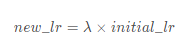
* StepLR：(optimizer, step_size, gamma=0.1, last_epoch=-1)
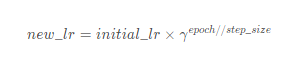
* MultiStepLR：(optimizer, milestones, gamma=0.1, last_epoch=-1)
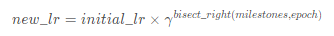
* ExponentialLR：(optimizer, gamma, last_epoch=-1)
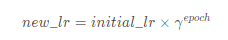
* CosineAnnealingLR：(optimizer, T_max, eta_min=0, last_epoch=-1)T_max 个 epoch 之后重新设置学习率
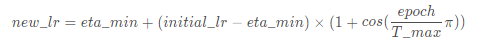

* ReduceLROnPlateau：(optimizer, mode='min', factor=0.1, patience=10, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)基于训练过程中的某些测量值对学习率进行动态的下降
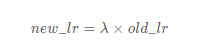

* Warmup
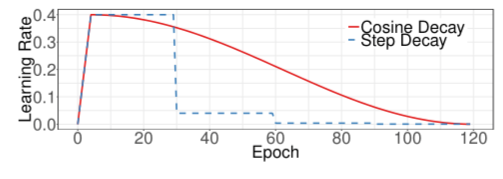



In [ ]:
class torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
# 参数
params (iterable)：需要优化的网络参数
lr (float, optional)：学习率
betas：用于计算梯度的平均和平方的系数
eps：为了提高数值稳定性而添加到分母的一个项
weight_decay：权值衰减
amsgrad：default: False，修正

# 属性
optimizer.defaults： 字典
optimizer.param_groups：列表

In [1]:
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import LambdaLR
import itertools


initial_lr = 0.1

class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)

    def forward(self, x):
        pass

net_1 = model()
net_2 = model()

optimizer_1 = torch.optim.Adam(net_1.parameters(), lr = initial_lr)
print("******************optimizer_1*********************")
print("optimizer_1.defaults：", optimizer_1.defaults)
print("optimizer_1.param_groups长度：", len(optimizer_1.param_groups))
print("optimizer_1.param_groups一个元素包含的键：", optimizer_1.param_groups[0].keys())


optimizer_2 = torch.optim.Adam([*net_1.parameters(), *net_2.parameters()], lr = initial_lr)
print("******************optimizer_2*********************")
print("optimizer_2.defaults：", optimizer_2.defaults)
print("optimizer_2.param_groups长度：", len(optimizer_2.param_groups))
print("optimizer_2.param_groups一个元素包含的键：", optimizer_2.param_groups[0].keys())


optimizer_3 = torch.optim.Adam([{"params": net_1.parameters()}, {"params": net_2.parameters()}], lr = initial_lr)
print("******************optimizer_3*********************")
print("optimizer_3.defaults：", optimizer_3.defaults)
print("optimizer_3.param_groups长度：", len(optimizer_3.param_groups))
print("optimizer_3.param_groups一个元素包含的键：", optimizer_3.param_groups[0].keys())


******************optimizer_1*********************
optimizer_1.defaults： {'lr': 0.1, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}
optimizer_1.param_groups长度： 1
optimizer_1.param_groups一个元素包含的键： dict_keys(['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad'])
******************optimizer_2*********************
optimizer_2.defaults： {'lr': 0.1, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}
optimizer_2.param_groups长度： 1
optimizer_2.param_groups一个元素包含的键： dict_keys(['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad'])
******************optimizer_3*********************
optimizer_3.defaults： {'lr': 0.1, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}
optimizer_3.param_groups长度： 2
optimizer_3.param_groups一个元素包含的键： dict_keys(['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad'])


In [ ]:
# scheduler运行流程：
model = [Parameter(torch.randn(2, 2, requires_grad=True))]
optimizer = SGD(model, 0.1)
scheduler = ExponentialLR(optimizer, gamma=0.9)

for epoch in range(20):
    for input, target in dataset:
        optimizer.zero_grad()
        output = model(input)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
    scheduler.step()

In [2]:
# LambdaLR
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import LambdaLR

initial_lr = 0.1

class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)

    def forward(self, x):
        pass

net_1 = model()

optimizer_1 = torch.optim.Adam(net_1.parameters(), lr = initial_lr)
scheduler_1 = LambdaLR(optimizer_1, lr_lambda=lambda epoch: 1/(epoch+1))

print("初始化的学习率：", optimizer_1.defaults['lr'])

for epoch in range(1, 11):
    # train

    optimizer_1.zero_grad()
    optimizer_1.step()
    print("第%d个epoch的学习率：%f" % (epoch, optimizer_1.param_groups[0]['lr']))
    scheduler_1.step()


初始化的学习率： 0.1
第1个epoch的学习率：0.100000
第2个epoch的学习率：0.050000
第3个epoch的学习率：0.033333
第4个epoch的学习率：0.025000
第5个epoch的学习率：0.020000
第6个epoch的学习率：0.016667
第7个epoch的学习率：0.014286
第8个epoch的学习率：0.012500
第9个epoch的学习率：0.011111
第10个epoch的学习率：0.010000


In [3]:
# StepLR
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
import itertools


initial_lr = 0.1

class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)

    def forward(self, x):
        pass

net_1 = model()

optimizer_1 = torch.optim.Adam(net_1.parameters(), lr = initial_lr)
scheduler_1 = StepLR(optimizer_1, step_size=3, gamma=0.1)

print("初始化的学习率：", optimizer_1.defaults['lr'])

for epoch in range(1, 11):
    # train
    optimizer_1.zero_grad()
    optimizer_1.step()
    print("第%d个epoch的学习率：%f" % (epoch, optimizer_1.param_groups[0]['lr']))
    scheduler_1.step()


初始化的学习率： 0.1
第1个epoch的学习率：0.100000
第2个epoch的学习率：0.100000
第3个epoch的学习率：0.100000
第4个epoch的学习率：0.010000
第5个epoch的学习率：0.010000
第6个epoch的学习率：0.010000
第7个epoch的学习率：0.001000
第8个epoch的学习率：0.001000
第9个epoch的学习率：0.001000
第10个epoch的学习率：0.000100


In [4]:
# MultiStepLR
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import MultiStepLR
import itertools


initial_lr = 0.1

class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)

    def forward(self, x):
        pass

net_1 = model()

optimizer_1 = torch.optim.Adam(net_1.parameters(), lr = initial_lr)
scheduler_1 = MultiStepLR(optimizer_1, milestones=[3, 7], gamma=0.1)

print("初始化的学习率：", optimizer_1.defaults['lr'])

for epoch in range(1, 11):
    # train
    optimizer_1.zero_grad()
    optimizer_1.step()
    print("第%d个epoch的学习率：%f" % (epoch, optimizer_1.param_groups[0]['lr']))
    scheduler_1.step()


初始化的学习率： 0.1
第1个epoch的学习率：0.100000
第2个epoch的学习率：0.100000
第3个epoch的学习率：0.100000
第4个epoch的学习率：0.010000
第5个epoch的学习率：0.010000
第6个epoch的学习率：0.010000
第7个epoch的学习率：0.010000
第8个epoch的学习率：0.001000
第9个epoch的学习率：0.001000
第10个epoch的学习率：0.001000


In [5]:
# ExponentialLR
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ExponentialLR
import itertools


initial_lr = 0.1

class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)

    def forward(self, x):
        pass

net_1 = model()

optimizer_1 = torch.optim.Adam(net_1.parameters(), lr = initial_lr)
scheduler_1 = ExponentialLR(optimizer_1, gamma=0.1)

print("初始化的学习率：", optimizer_1.defaults['lr'])

for epoch in range(1, 11):
    # train
    optimizer_1.zero_grad()
    optimizer_1.step()
    print("第%d个epoch的学习率：%f" % (epoch, optimizer_1.param_groups[0]['lr']))
    scheduler_1.step()


初始化的学习率： 0.1
第1个epoch的学习率：0.100000
第2个epoch的学习率：0.010000
第3个epoch的学习率：0.001000
第4个epoch的学习率：0.000100
第5个epoch的学习率：0.000010
第6个epoch的学习率：0.000001
第7个epoch的学习率：0.000000
第8个epoch的学习率：0.000000
第9个epoch的学习率：0.000000
第10个epoch的学习率：0.000000


初始化的学习率： 0.1
第1个epoch的学习率：0.100000
第2个epoch的学习率：0.097553
第3个epoch的学习率：0.090451
第4个epoch的学习率：0.079389
第5个epoch的学习率：0.065451
第6个epoch的学习率：0.050000
第7个epoch的学习率：0.034549
第8个epoch的学习率：0.020611
第9个epoch的学习率：0.009549
第10个epoch的学习率：0.002447
第11个epoch的学习率：0.000000
第12个epoch的学习率：0.002447
第13个epoch的学习率：0.009549
第14个epoch的学习率：0.020611
第15个epoch的学习率：0.034549
第16个epoch的学习率：0.050000
第17个epoch的学习率：0.065451
第18个epoch的学习率：0.079389
第19个epoch的学习率：0.090451
第20个epoch的学习率：0.097553
第21个epoch的学习率：0.100000
第22个epoch的学习率：0.097553
第23个epoch的学习率：0.090451
第24个epoch的学习率：0.079389
第25个epoch的学习率：0.065451
第26个epoch的学习率：0.050000
第27个epoch的学习率：0.034549
第28个epoch的学习率：0.020611
第29个epoch的学习率：0.009549
第30个epoch的学习率：0.002447
第31个epoch的学习率：0.000000
第32个epoch的学习率：0.002447
第33个epoch的学习率：0.009549
第34个epoch的学习率：0.020611
第35个epoch的学习率：0.034549
第36个epoch的学习率：0.050000
第37个epoch的学习率：0.065451
第38个epoch的学习率：0.079389
第39个epoch的学习率：0.090451
第40个epoch的学习率：0.097553
第41个epoch的学习率：0.100000
第42个epoch的学习率：0.097553
第43个epoch的学习率：0.090451
第44个epo

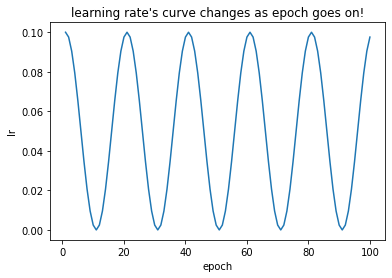

In [6]:
# CosineAnnealingLR 
%matplotlib inline
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import CosineAnnealingLR
import itertools

import matplotlib.pyplot as plt


initial_lr = 0.1

class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)

    def forward(self, x):
        pass

net_1 = model()

optimizer_1 = torch.optim.Adam(net_1.parameters(), lr = initial_lr)
scheduler_1 = CosineAnnealingLR(optimizer_1, T_max=10)

print("初始化的学习率：", optimizer_1.defaults['lr'])

lr_list = [] # 把使用过的lr都保存下来，之后画出它的变化

for epoch in range(1, 101):
    # train
    optimizer_1.zero_grad()
    optimizer_1.step()
    print("第%d个epoch的学习率：%f" % (epoch, optimizer_1.param_groups[0]['lr']))
    lr_list.append(optimizer_1.param_groups[0]['lr'])
    scheduler_1.step()

# 画出lr的变化
plt.plot(list(range(1, 101)), lr_list)
plt.xlabel("epoch")
plt.ylabel("lr")
plt.title("learning rate's curve changes as epoch goes on!")
plt.show()


In [7]:
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau
import itertools


initial_lr = 0.1

class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)

    def forward(self, x):
        pass

net_1 = model()

optimizer_1 = torch.optim.Adam(net_1.parameters(), lr = initial_lr)
scheduler_1 = ReduceLROnPlateau(optimizer_1, mode='min', factor=0.1, patience=2)

print("初始化的学习率：", optimizer_1.defaults['lr'])

for epoch in range(1, 15):
    # train
    train_loss = 2
    optimizer_1.zero_grad()
    optimizer_1.step()
    print("第%d个epoch的学习率：%f" % (epoch, optimizer_1.param_groups[0]['lr']))
    scheduler_1.step(train_loss)


初始化的学习率： 0.1
第1个epoch的学习率：0.100000
第2个epoch的学习率：0.100000
第3个epoch的学习率：0.100000
第4个epoch的学习率：0.100000
第5个epoch的学习率：0.010000
第6个epoch的学习率：0.010000
第7个epoch的学习率：0.010000
第8个epoch的学习率：0.001000
第9个epoch的学习率：0.001000
第10个epoch的学习率：0.001000
第11个epoch的学习率：0.000100
第12个epoch的学习率：0.000100
第13个epoch的学习率：0.000100
第14个epoch的学习率：0.000010


In [ ]:
# Warmup
import torch
from torch.optim.lr_scheduler import _LRScheduler


class WarmUpLR(_LRScheduler):
    """warmup_training learning rate scheduler
    Args:
        optimizer: optimzier(e.g. SGD)
        total_iters: totoal_iters of warmup phase
    """
    def __init__(self, optimizer, total_iters, last_epoch=-1):
       
        self.total_iters = total_iters
        super().__init__(optimizer, last_epoch)

    def get_lr(self):
        """we will use the first m batches, and set the learning
        rate to base_lr * m / total_iters
        """
        return [base_lr * self.last_epoch / (self.total_iters + 1e-8) for base_lr in self.base_lrs]

In [ ]:
# 在训练代码中使用：
criterion = nn.CrossEntropyLoss() 
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

warmup_epoch = 5
scheduler = CosineAnnealingLR(optimizer, 100 - warmup_epoch)

iter_per_epoch = len(train_dataset)
warmup_scheduler = WarmUpLR(optimizer, iter_per_epoch * warmup_epoch)

for epoch in range(1, max_epoch+1):
    if epoch >= warmup_epoch:
        scheduler.step()
        learn_rate = scheduler.get_lr()[0]
        print("Learn_rate:%s" % learn_rate)
    test(epoch, net, valloader, criterion)
    train(epoch, net, trainloader, optimizer, criterion, warmup_scheduler)

In [ ]:
# 在train中的修改
for (inputs, targets) in tqdm(trainloader):
        if epoch < 5:
            warmup_scheduler.step()
            warm_lr = warmup_scheduler.get_lr()
            print("warm_lr:%s" % warm_lr)
        inputs, targets = inputs.to(device), targets.to(device)